# Практика 1

---

Общие правила:

* Каждый день помимо лекции будет 1 практика - это `jupyter`-ноутбук, в котором есть задачки на разное количество правил.
* Рекомендуем выполнять задания в ноутбуке последовательно - они могут быть связаны друг с другом
* Выполнение не обязательно, но точно поможет лучше понять тему
* После выполнения практики (даже не целиком) следует скинуть ее проверяющим в телеграме в личку - либо Мише, либо Владу, как удобно)
* Также практика - отличный повод обсудить какие-то интересующие вещи (но если будут другие вопросы - все равно пишите).

---

На этой практике мы посмотрим на пример временного ряда, построим модели из лекции и получим первые приближения наших предсказаний!

Для начала склонируем наш репозиторий - там лежат нужные нам данные:

In [49]:
!git clone https://github.com/ArChanDDD/TS-MCSSirius-2024.git

fatal: destination path 'TS-MCSSirius-2024' already exists and is not an empty directory.


## Шаг 1: Знакомство с Pandas (1 балл)

В наше время, почти в любой ML-задаче нужно работать с _датасетами_ - структурированным набором данных. По большому счеты, это может быть обычный `.txt`-файл, но, само собой, работать с ним может быть не очень удобно.

Поэтому существуют библиотеки, которые предоставляют удобный функционал для работы с датасетами. `Pandas` - наверное, самая популярная такая библиотека.

На этом шаге мы познакомимся с этой библиотекой, посмотрим на функционал, и научимся выполнять базовые действия с датасетом.

In [50]:
# Импортируем ее
import pandas as pd
# А эта библиотека для красивых графиков
import matplotlib.pyplot as plt
# А это чтобы крутые операции быстро делать
import numpy as np

Все это время мы будем работать со датасетом `DailyDelhiClimate` - он содержит информацию о погодных условиях в Дели в 2013-2017 годах.

Сначала стоит посмотреть, что там вообще есть:

In [51]:
# Операция номер 0 -- чтение датасета.
df = pd.read_csv('TS-MCSSirius-2024/data/DailyDelhiClimateTrain.csv')

# Выводим только первые 5 строк:
df.head(5)

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


Понимать `pandas`-датасеты нужно так:
* Строчки - это записи
* Столбцы - это параметры, _фичи_

Получается, из параметров у нас есть

* Дата
* Средняя температура
* Влажность
* Скорость ветра
* Среднее давление

Например: 1 января 2013 года средняя температура была 10 градусов, влажность - 84.5, ветра не было, среднее давление - 1015 мм.рт.ст.

---

А теперь давайте разберемся, какие операции с датасетом можно делать (хотя корректнее его называть _ДатаФрейм_, но как удобно):

In [52]:
# Cложение столбцов
df['meantemp'] + df['humidity']

0        94.500000
1        99.400000
2        94.166667
3        80.000000
4        92.833333
           ...    
1457     85.260870
1458    103.095238
1459    103.761905
1460    102.052632
1461    110.000000
Length: 1462, dtype: float64

Возвращает пандасовскую структуру - если хотим работать с ней как с чем-то более привычным, сделаем так:

In [53]:
# Cложение столбцов, и список на выход
list(df['meantemp'] + df['humidity'])

[94.5,
 99.4,
 94.16666666666667,
 80.0,
 92.83333333333333,
 89.8,
 85.6,
 72.57142857142858,
 65.25,
 73.0,
 67.0,
 88.0,
 91.0,
 101.0,
 86.57142857142857,
 100.5,
 97.33333333333333,
 106.00000000000001,
 89.16666666666667,
 86.57142857142858,
 88.2,
 89.16666666666667,
 74.16666666666666,
 74.49999999999999,
 79.25,
 76.83333333333334,
 78.42857142857143,
 70.83333333333333,
 79.625,
 85.14285714285714,
 81.8,
 89.0,
 93.85714285714286,
 83.57142857142857,
 91.71428571428572,
 109.0,
 88.0,
 75.0,
 84.42857142857143,
 76.71428571428571,
 86.75,
 86.375,
 85.66666666666666,
 86.42857142857142,
 81.16666666666667,
 84.5,
 107.14285714285715,
 103.66666666666667,
 94.0,
 97.85714285714286,
 92.42857142857142,
 87.28571428571429,
 86.125,
 92.28571428571429,
 95.71428571428572,
 89.75,
 87.85714285714286,
 78.0,
 72.28571428571428,
 66.66666666666667,
 73.0,
 82.16666666666666,
 88.6,
 82.75,
 86.14285714285715,
 80.57142857142857,
 69.0,
 75.14285714285715,
 80.71428571428571,
 90.33

и вот это уже обычный список - а с ним можно спокойно работать :)

Можно кстати создать новый столбец из списка:

In [54]:
df['meantemp + humidity'] = list(df['meantemp'] + df['humidity'])
df

,date,meantemp,humidity,wind_speed,meanpressure,meantemp + humidity
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,94.500000
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,99.400000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,94.166667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,80.000000
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,92.833333
...,...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217,85.260870
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762,103.095238
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762,103.761905
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000,102.052632


Здорово, да?

Помимо этого, столбцы аналогично поддерживают вычитание, деление, умножение, а также можно делать все эти действия с константой:

In [55]:
# [:5] чтобы вернуть только первые 5 значений
(df['meantemp'] * 2)[:5]

0    20.000000
1    14.800000
2    14.333333
3    17.333333
4    12.000000
Name: meantemp, dtype: float64

Давай чуть-чуть попрактикуемся - посчитай для первых пяти записей разность удвоенной температуры и скорости ветра:

### Задачка 1 (0.5 балла)

In [56]:


result = [df['meantemp'][i] * 2 - df['wind_speed'][i] for i in range(5)]

assert len(result) == 5, "Нужно посчитать только для первых 5 записей"
assert np.allclose(list(result), [20.0, 11.82, 9.7, 16.1, 8.3]), "Что-то посчитано не так"

Иногда появляется необходимость итерироваться по записям в датасете - и, к сожалению, в пандасе с этим все грустно.
Но есть иной вариант:

In [57]:
# Обернем датасет в массив из numpy
np.array(df[:5])

array([['2013-01-01', 10.0, 84.5, 0.0, 1015.6666666666666, 94.5],
       ['2013-01-02', 7.4, 92.0, 2.98, 1017.8, 99.4],
       ['2013-01-03', 7.166666666666667, 87.0, 4.633333333333334,
        1018.6666666666666, 94.16666666666667],
       ['2013-01-04', 8.666666666666666, 71.33333333333333,
        1.2333333333333334, 1017.1666666666666, 80.0],
       ['2013-01-05', 6.0, 86.83333333333333, 3.7, 1016.5,
        92.83333333333333]], dtype=object)

Как видно, теперь это обычный список из списков, каждый из которых соответствует одной записи. А по списку итерироваться уже не так и сложно!

### Задачка 2 (0.5 балла)

Следующая задачка - посчитать сумму всех температур с помощью цикла `for`.

In [58]:


result = sum(df['meantemp'][i] for i in range(len(df['meantemp'])))

assert np.isclose(result, 37274.45)

Но вообще эту задачу можно было решить и так:

In [59]:
result_2 = sum(df['meantemp'])

print(f'Было  - {result}')
print(f'Стало - {result_2}')

Было  - 37274.4511987237
Стало - 37274.4511987237


# Шаг 2: Обзор данных

Раз уж мы там в датасет напихали всякого, давайте заново его импортируем



In [60]:
df = pd.read_csv('TS-MCSSirius-2024/data/DailyDelhiClimateTrain.csv')
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


На самом деле тут есть проблемка, которую мы сейчас пофиксим:

In [61]:
df['date']

0       2013-01-01
1       2013-01-02
2       2013-01-03
3       2013-01-04
4       2013-01-05
           ...    
1457    2016-12-28
1458    2016-12-29
1459    2016-12-30
1460    2016-12-31
1461    2017-01-01
Name: date, Length: 1462, dtype: object

Как мы видим, тип стоит `object` - это плохо, потому что графики будут кривыми (можете построить, если интересно). Но это фиксится просто:

In [62]:
from datetime import datetime

df['date'] = [datetime.strptime(x, '%Y-%m-%d') for x in list(df['date'])]

df['date']

0      2013-01-01
1      2013-01-02
2      2013-01-03
3      2013-01-04
4      2013-01-05
          ...    
1457   2016-12-28
1458   2016-12-29
1459   2016-12-30
1460   2016-12-31
1461   2017-01-01
Name: date, Length: 1462, dtype: datetime64[ns]

Теперь хорошо!

**Наша главная цель** - научиться предсказывать температуру, поэтому, чтобы не забыть, создадим столбец `target`, который будет равен столбцу `meantemp`.

In [63]:
df['target'] = df['meantemp']

А теперь давайте вообще посмотрим на наш временной ряд:

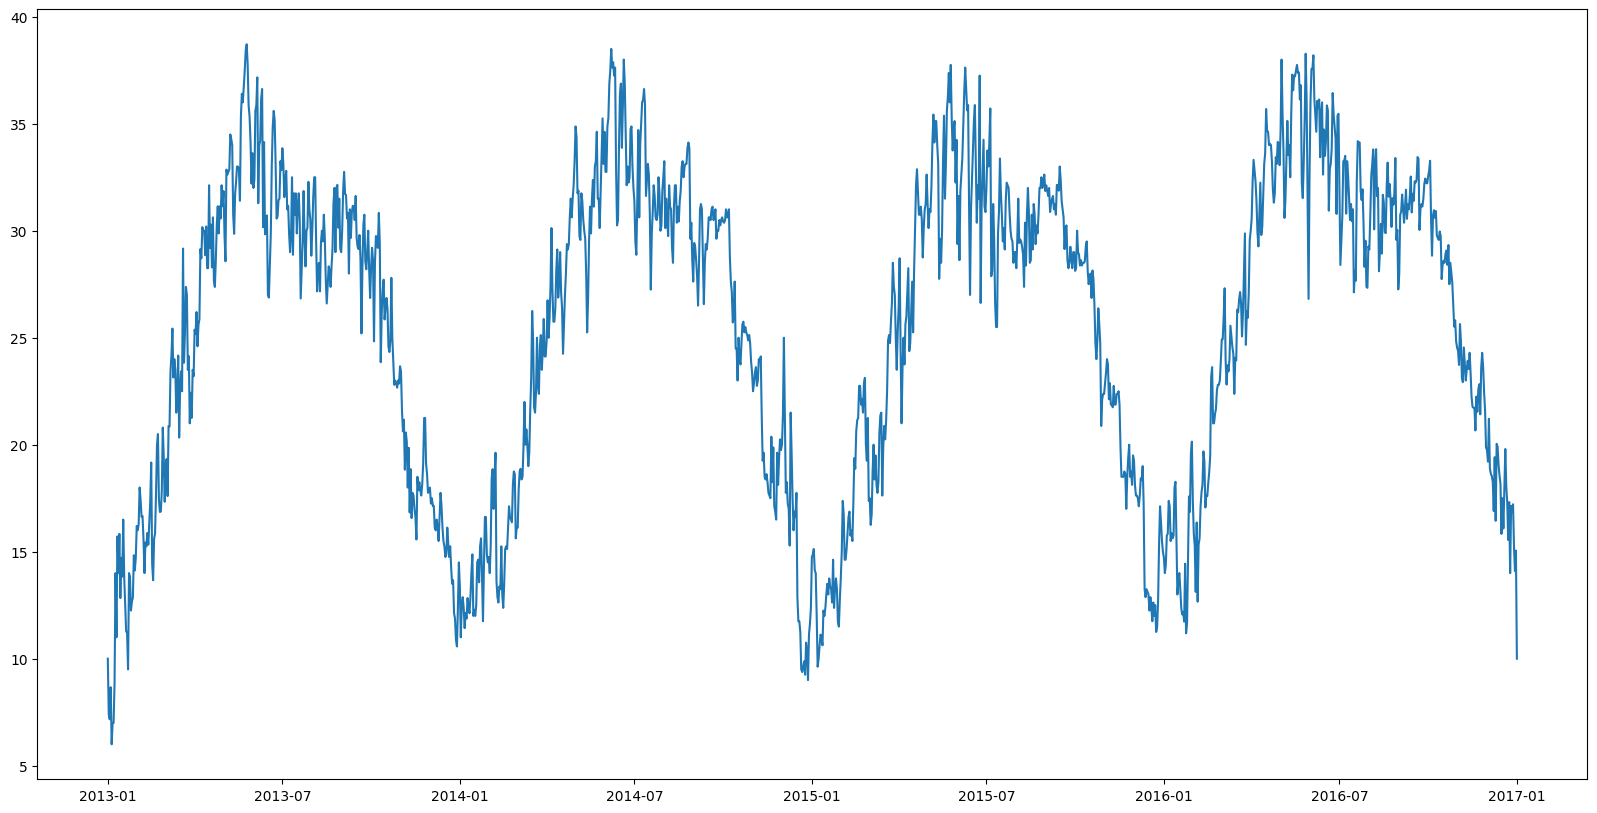

In [64]:
_, _ = plt.subplots(1,1,figsize=(20,10))
_ = plt.plot(df['date'], df['target']) # это значит, что по оси ОХ будет дата, а по оси OY будет наша температура

Первое правило при работе с любой задачей машинного обучения - понять, что за данные. Что мы можем сказать про этот ряд? Есть ли у него тренд? А периодичность? Можно его назвать стационарным?

# Шаг 3: Наивная модель (3 балла)

Понимаю, хочется начать предсказывать - мы же тут как раз для этого!

Поэтому, давайте начнем с базовой модели - наивной. На всякий случай напомню, что это:

> **Наивной моделью** для задачи прогнозирования временных рядов называется модель, которая сопоставляет $y_t$ значение, которое было $lag$ шагов назад - то есть $y_{t-lag}$

> Для оценки наших моделей мы будем использовать валидацию на последнем "горбу" - вот этой четвертой горке на графике.

> Для этого мы разобьем датасет на две части - на одной мы будем обучаться, а на другой проверять качество наших моделек. Такие датасеты принято называть `train` и `val` -- для обучения и валидации соответственно.

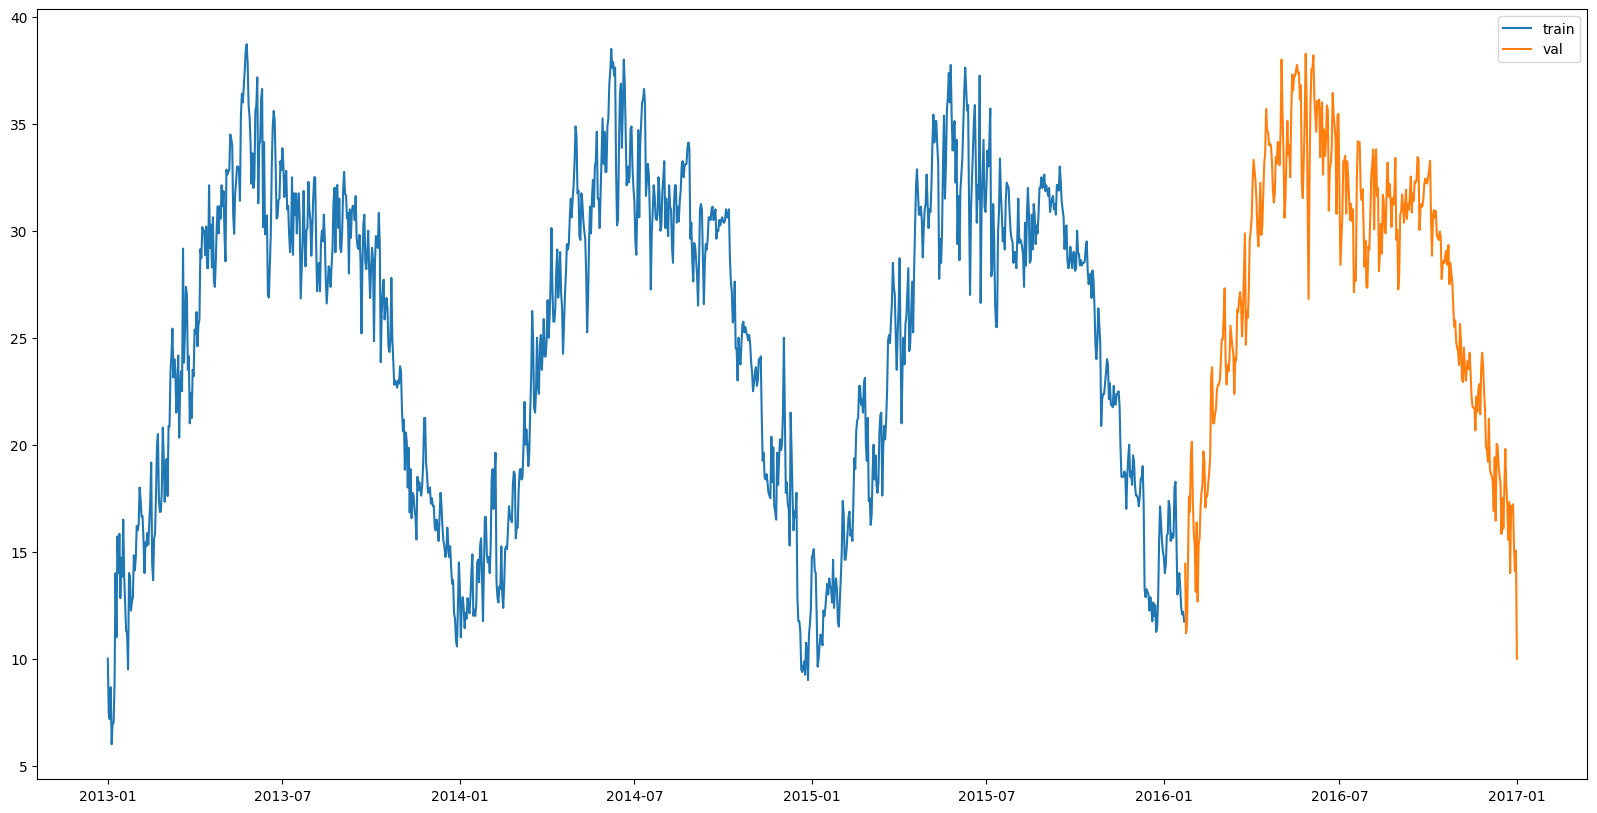

In [65]:
# Валидация начнется с 1117 значения
val_start = 1117

df_train = df[:val_start]
df_val = df[val_start:]

_, _ = plt.subplots(1,1,figsize=(20,10))
_ = plt.plot(df_train['date'], df_train['target'], label='train')
_ = plt.plot(df_val['date'], df_val['target'], label='val')
_ = plt.legend()

In [66]:
# Просто функция для построения графиков, можете не обращать много внимания)
def plot_graph(y_pred):
  _, _ = plt.subplots(1,1,figsize=(18,10))
  _ = plt.plot(df_train['date'], df_train['target'], label='train')
  _ = plt.plot(df_val['date'], df_val['target'], label='val')
  _ = plt.plot(df_val['date'], y_pred, label='predict')
  _ = plt.legend()

### Задача 3 - реализация наивной модели (1.5 балла)

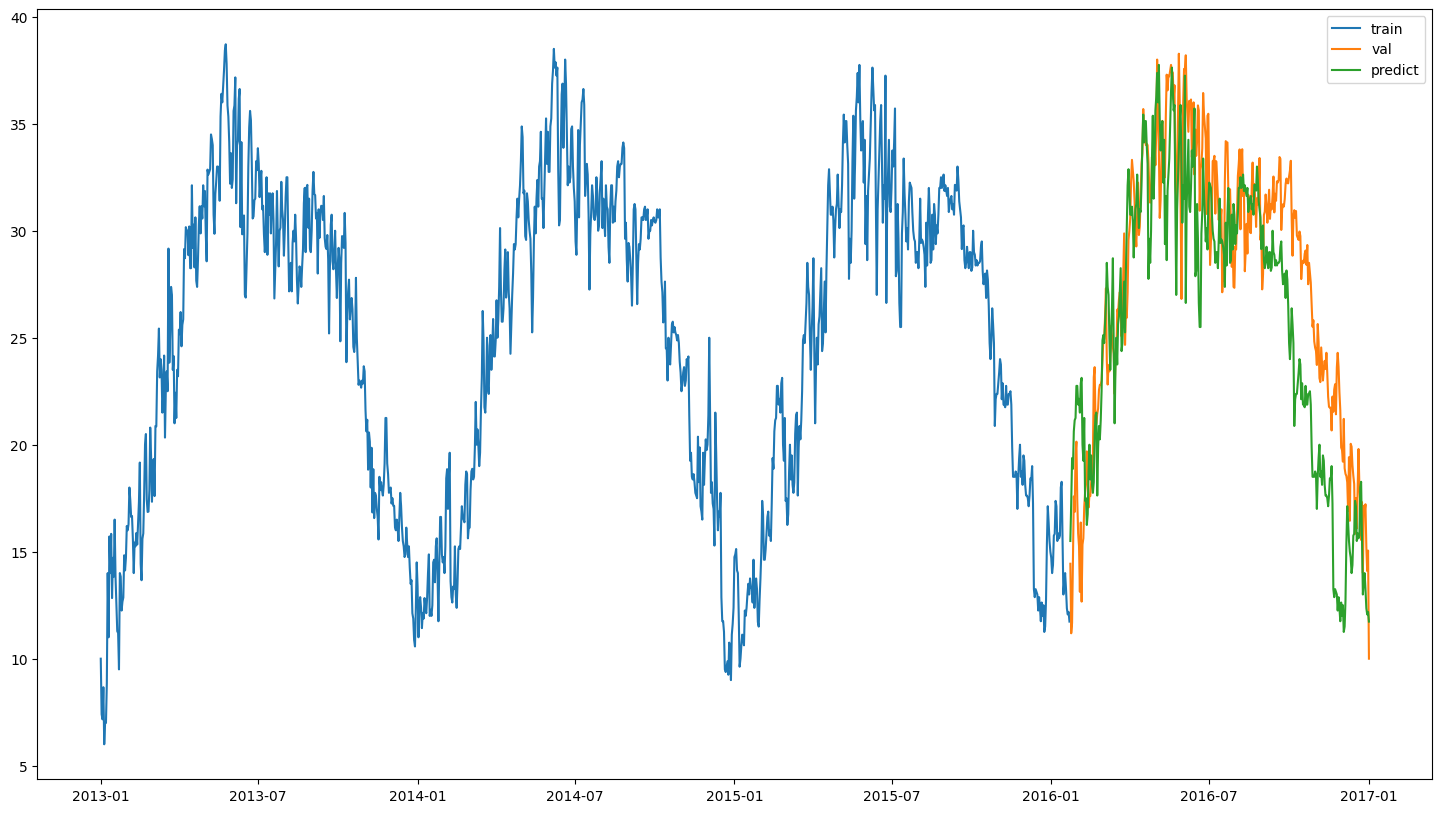

In [67]:
lag = len(df_val) # пусть будет так - но если хочется, можно другое число поставить

### TODO ###
# Необходимо для каждого i < len(df_val) добавить в y_pred то значение, которое было в df_train lag позиций назад
# То есть для lag=5 у нас получится так:
# * train = [1,2,3,4,5,6,7]
# * pred  = [3,4,5]

y_pred = []

for i in range(len(df_val)):
  y_pred.append(df_train['target'][len(df_train['target']) - lag + i])


plot_graph(y_pred)

Вначале вроде как даже неплохо, но потом становится совсем плохо...

Давайте оценим насколько все плохо - для этого посчитаем функцию
$$
MSE = \frac{1}{n}\sum_{i=0}^n (y_i - \hat{y}_i)^2
$$

Где:

* $y_i$ - правильно значение (которое `val`)
* $\hat{y}_i$ - предсказанное значение (которое `y_pred`)
* $n$ - длина массива `y_pred` и `val`

Реализуйте эту функцию!

### Задача 4 - реализация MSE (1.5 балла)

In [68]:
# TODO

def MSE(y_true, y_pred):
  result = sum((y_true[i] - y_pred[i])**2 for i in range(len(y_true))) / len(y_true)
  return result

In [69]:
mse = MSE(list(df_val['target']), y_pred)
print(mse)

assert np.isclose(mse, 17.575336), "Функция делает что-то не так..."

17.57533594293285


Сложно сказать, хорошо это или нет, но будем считать эту ошибку ориентиром - _бейзлайном_. Наша цель - сделать ее как можно меньше (а значит предсказание станет наиболее точным).

# Шаг 4: Линейная регрессия (6 баллов)

Наш следующий шаг - построить линейную регрессию. К огромному счастью, в питоне это все уже есть, а значит наша задача лишь подготовить данные

## Регрессия на одном параметре (2 балла)

Для начала давайте попробуем, как в примере на лекции, построить регрессию, в которой `x` будет равен дню в месяце.

<details><summary> Подсказка 1 </summary>

Не забывайте о том, что по `df_train['date']` можно итерироваться!

</details>

<details><summary> Подсказка 2 </summary>

Для каждого `x` в `df_train['date']` можно сделать `x.day` и получить день месяца.

</details>

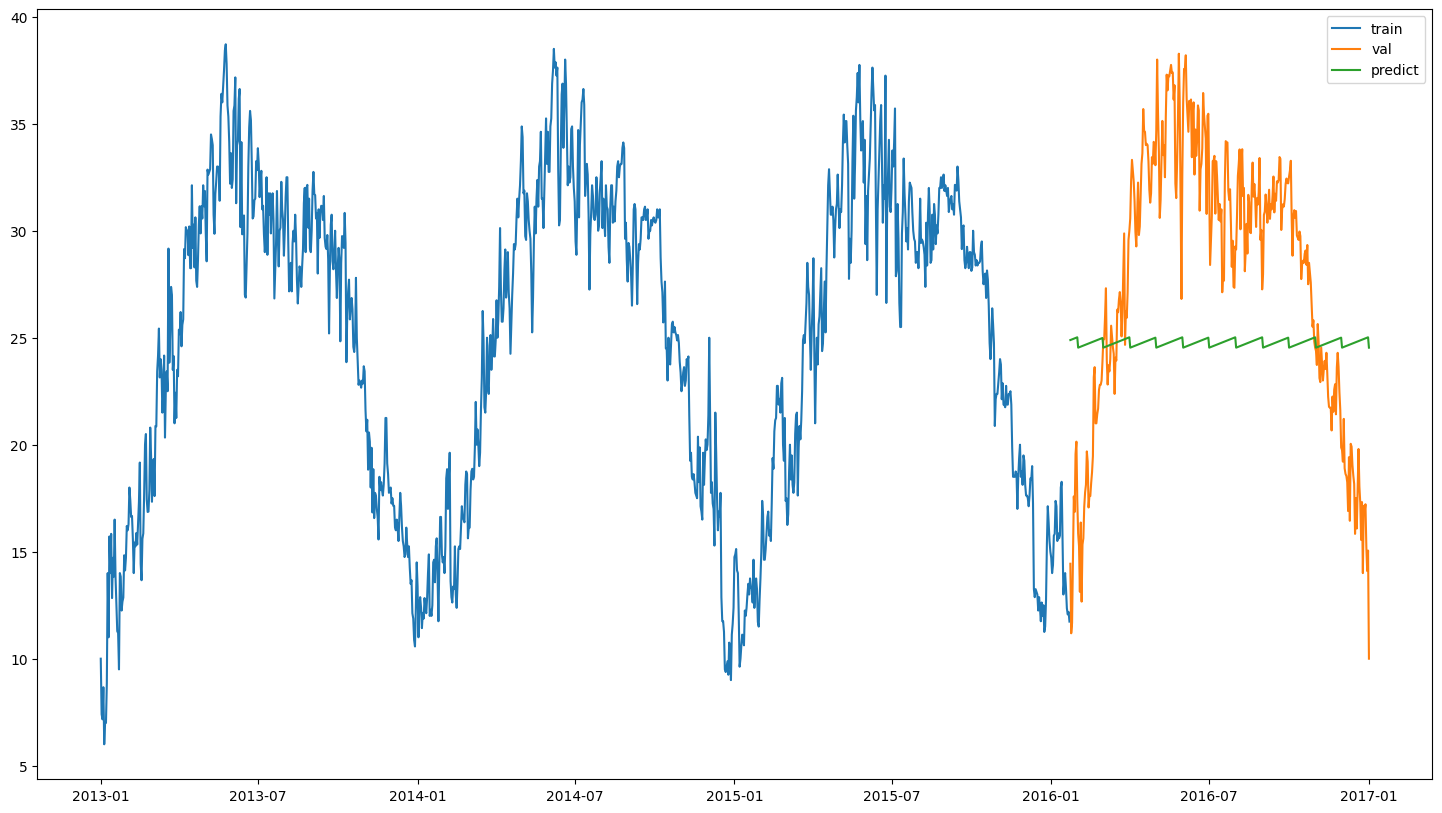

In [70]:
# Достаем модель - линейную регрессию
from sklearn.linear_model import LinearRegression

# Почти у всех основных моделей в ML есть основные методы:
# * fit() - обучение модели, на вход как правило подается X - данные, y - целевое значение
# * predict() - предсказание, на вход подается X - возвраещается y_pred

# Определяем модель
model = LinearRegression()

# TODO
# X и X_val строятся одинаковым алгоритмом, но на разных датасетах. Мы чуть раньше рассказывали чем они отличаются.

y = list(df_train['target'])
X = [x.day for x in df_train['date']]
X_val = [x.day for x in df_val['date']]


# Тут сначала оборачиваем в массив numpy, потом делаем так, чтобы числа были в столбик, а не в строку
X = np.array(X).reshape(-1, 1)
X_val = np.array(X_val).reshape(-1, 1)
# Ну и обучаем, конечно
model.fit(X, y)

y_pred = model.predict(X_val)

plot_graph(y_pred)

Получилось что-то странное, не так ли? И в этом на самом деле нет ничего странного - насколько мы помним, наша функция принимала вид $y=kx$, а даже при учете, что дни чередуются, описать что-то хорошо не получится :(

В любом случае, посчитаем MSE

In [71]:
MSE(y_pred, list(df_val['target']))

50.13652945687462

Cурово. Попробуем сделать регрессию на нескольких параметрах - построим $y=\sum k_ix_i$

## Регрессия на нескольких параметрах (4 балла)

Вообще, по графику можно увидеть, что линейной функцией приблизить не получится - вот бы можно было сделать что-то вроде $y=k_1x_1 + k_2x_2^2$...

Но ведь так можно сделать! С одно стороны, это уже полиномиальная регрессия, с другой стороны - это линейная регрессия, в которой есть полиномы. Поэтому давайте создадим эти полиномы - сделайте аналогично прыдущему пункту, но теперь мы будем обучаться не на `[day]`, а на `[day, day^2, month, month^2]`

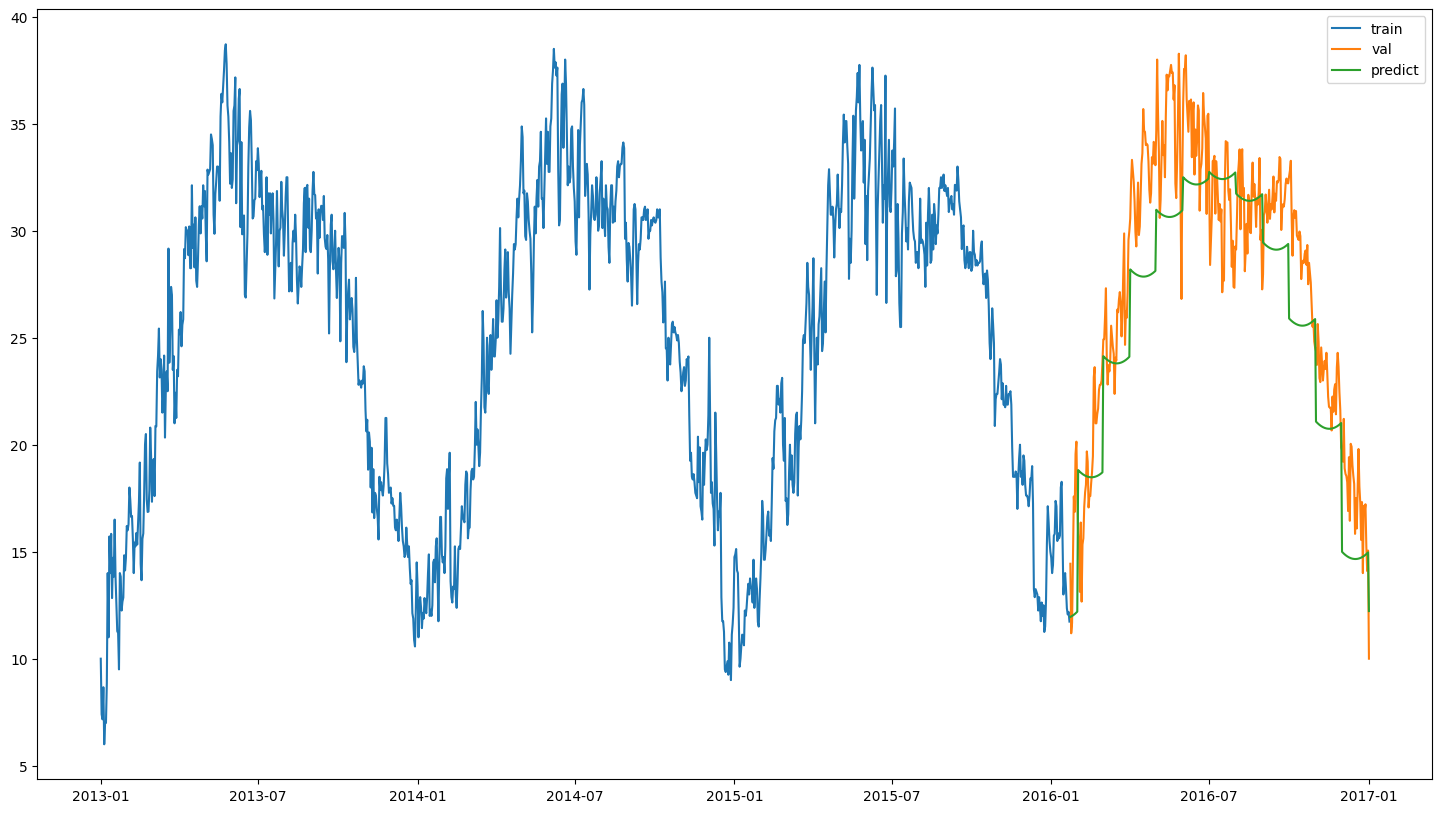

In [72]:
model = LinearRegression()

# TODO

y = list(df_train['target'])
X = [[x.day, x.day ** 2, x.month, x.month ** 2] for x in df_train['date']]
X_val = [[x.day, x.day ** 2, x.month, x.month ** 2] for x in df_val['date']]


# Тут сначала оборачиваем в массив numpy, потом делаем так, чтобы числа были в столбик, а не в строку
X = np.array(X).reshape(-1, 4)
X_val = np.array(X_val).reshape(-1, 4)
# Ну и обучаем, конечно
model.fit(X, y)

y_pred = model.predict(X_val)

plot_graph(y_pred)

In [73]:
MSE(y_pred, list(df_val['target']))

11.508459552559707

Ну это ведь уже совсем другое дело! Даже на графике видно, что стало заметно лучше, а MSE стал лучше почти на 40%! И все благодаря тому, что мы добавили несколько экзогенных переменных.

На самом деле, Линейная регрессия - штука очень мощная. И не просто так всякие дата-саентисты часто ей пользуются - ведь она умеет так:

In [74]:
list(model.coef_)

[-0.046892508017624956,
 0.0014363104314372697,
 8.491646540868006,
 -0.6338343894827367]

Это коэфициенты нашей модели - $i$-й коэфициент соответсвует $i$-му параметру в $X$.

Видно, что модель обращает большое внимание на месяц, а не на день - именно поэтому наша предыдущая модель была такой плохой.

---

Не думайте, что линейная регрессия это не тру - ради интереса можете попробовать добавить еще параметров. Вот увидите, результат может быть очень крутым 😁